In [1]:
# 資料收集 一個人收4種距離 故xxx-1 xxx-2 xxx-3 xxx-4

#前提需要 :
#偵測人臉detector dlib.get_frontal_face_detector() import from dlib庫
#偵測68點人臉位置 

In [2]:
#困難點

#使用在現實中 程式內容不能太複雜 --> 讀取存取不能太多 否則程式會慢

#人臉辨識部分 

#人臉距離部分 : 若太近則臉部大小變化會引響判斷 --> 訓練特徵不能太少否則變化性大(如僅有臉寬、臉高) 臉寬、臉高+68個位置 距離頭頂高度 & 距離左臉夾寬度 = 138點

In [4]:
path = "C:/Users/student/Desktop/github/Vision/data_all"

# 拍人臉照片 & 收集距離

In [5]:
#拍人臉照片 & 收集距離
import dlib                     
import numpy as np              
import cv2                      

class face_emotion():
 
    def __init__(self):        
        self.detector = dlib.get_frontal_face_detector() # 偵測人臉位置
        self.predictor = dlib.shape_predictor(path+"/opencv-master/data/haarcascades/shape_predictor_68_face_landmarks.dat") #偵測68    
        self.cap = cv2.VideoCapture(0)
        self.cap.set(3, 480)
        self.cnt = 0

    def learning_face(self):       
        count=800
        
        save_orignal="C:/Users/student/Desktop/github/Vision/save_photo/face" #存原始攝影機照片位置
        save_face="C:/Users/student/Desktop/github/Vision/save_photo/face_cut" #存截取下人臉位置
        with open('C:/Users/student/Desktop/github/Vision/save_photo/face_distance_train_distance_90.txt','a',encoding='utf-8') as file:
            while(self.cap.isOpened()):

                flag, im_rd = self.cap.read()
                k = cv2.waitKey(1)
                img_gray = cv2.cvtColor(im_rd, cv2.COLOR_RGB2GRAY) #灰階        
                faces = self.detector(img_gray, 0) #用灰階的來偵測人臉數
                font = cv2.FONT_HERSHEY_SIMPLEX   
                if(len(faces)==1): #若偵測到一張人臉

                    for i in range(len(faces)):#從第一張臉開始處理
                        for k, d in enumerate(faces): # d是位置
                            cv2.rectangle(im_rd, (d.left(), d.top()), (d.right(), d.bottom()), (0, 0, 255)) #先用框框將人臉框住
                            self.face_width = d.right() - d.left() #此人臉的寬度
                            self.face_high = d.bottom() - d.top() #此人臉的高度
                            file.write(str(self.face_width)+'\n')
                            file.write(str(self.face_high)+'\n')
                            im_rd = cv2.putText(im_rd, 'person'+str(i)+str(int(self.face_width))+str(int(self.face_high)), (d.left(), d.top()), font, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
                            shape = self.predictor(im_rd, d) # 將圖檔 及 人臉位置 傳給 偵測68點的程式判斷

                            for face_point in range(68):
                                cv2.circle(im_rd, (shape.part(face_point).x, shape.part(face_point).y), 2, (0, 255, 0), -1, 8) #特地將每個點都框出來
                                file.write(str(shape.part(face_point).y - d.top()) +'\n')
                                file.write(str(shape.part(face_point).x - d.left()) +'\n')

                            #存照片部分

                            if count<1200: # 設定存多少張照片
                                cv2.imwrite(save_orignal + str(count) +".jpg", img_gray) #先存一張在save_orignal 備份 img_gray(灰階) im_rd(彩色+有框)

                                img = cv2.imread(save_orignal + str(count) + ".jpg")  
                                face_rects = self.detector(img, 0)
                                for i, d in enumerate(face_rects):
                                    img_face = img[d.top():d.bottom(),d.left():d.right()] #擷取人臉部分
                                    img_face = cv2.resize(img_face, (125,125), interpolation=cv2.INTER_CUBIC) #將擷取部分壓縮成125 * 125
                                    cv2.imshow("Face Detection "+str(i), img_face) #將擷取下人臉部分show出來
                                    cv2.imwrite(save_face+str(count)+".jpg", img_face) #存下人臉
                                    im_rd = cv2.putText(im_rd, "screenshot"+str(count), (20, 450), font, 0.8, (0, 0, 255), 1, cv2.LINE_AA) #寫下存了多少張
                                count=count+1
                            else:
                                im_rd = cv2.putText(im_rd,"screenshot"+str(count), (20, 450), font, 0.8, (0, 0, 255), 1, cv2.LINE_AA)                                  

                else:
                    cv2.putText(im_rd, "No Face", (20, 50), font, 1, (0, 0, 255), 1, cv2.LINE_AA)
                cv2.imshow("camera", im_rd)
                file.write('\n')
                if k==ord('q'):
                    break
        self.cap.release()
        cv2.destroyAllWindows()
        
if __name__ == "__main__":
    my_face = face_emotion()
    my_face.learning_face()

# 製作 人臉辨識model

In [2]:
#製作 人臉辨識model

In [7]:
#資料庫

import cv2
import dlib
import os
import imutils
from os import listdir
from os.path import isfile, isdir, join
import numpy as np
from os import walk
import pandas as pd
import numpy as np


list_name=[]
path = "C:/Users/student/Desktop/github/Vision/save_photo/face_data"    #獲取當前路徑 !!!!!!!!!!!!!!

num_dirs = 0 #路徑下資料夾數量
num_files = 0 #路徑下檔案數量(包括資料夾)
num_files_rec = 0 #路徑下檔案數量,包括子資料夾裡的檔案數量，不包括空資料夾


for root,dirs,files in os.walk(path):    #遍歷統計''
    for name in dirs:
        num_dirs += 1
        print (os.path.join(root,name),"資料夾名稱:",name)
        list_name.append(name)
'''
for fn in os.listdir(path):
        num_files += 1
        print (fn)
'''
print ("路徑下資料夾數量",num_dirs)

people=len(list_name)
all_space=[]
answer=0

for run in range(people):

    mypath=path+"/"+list_name[run]
    math=0 
    for root, dirs, files in walk(mypath):
        print("檔案大小:",len(files))
    math=len(files)
    all_space.append(math)
    answer=answer+all_space[run]
print("需要總空間:",answer)
train=[]
target=[]
for i in range(answer):#多一個當標題
    train.append([])
    target.append([])
print(np.shape(train))
train_num=0
target_num_z=0
target_num=[0]

for run in range(people):
    
    mypath=path+"/"+list_name[run]
    math=0 
    for root, dirs, files in walk(mypath):
        print(mypath)
        print("檔案個數:",len(files))
        target_num_z+=len(files)
        target_num.append(target_num_z)
    math=all_space[run]
    for picture in range(math): 
        img = cv2.imread(mypath+"/"+files[picture])
        train[train_num]=img
        train_num+=1
        
for run in range(people):
    for k in range(target_num[run],target_num[run+1]):
        target[k].append(run)
print("data",np.shape(train))
print("label",np.shape(target))

路徑下資料夾數量 0
需要總空間: 0
(0,)
data (0,)
label (0,)


In [2]:
#資料切割與訓練

from sklearn.model_selection import train_test_split
x_Train,x_Test,y_Train,y_Test = train_test_split(train,target,test_size=0.3,random_state=33)
print('x_train_image:',np.shape(x_Train))
print('y_train_label:',np.shape(y_Train))
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

x_train_image: (2688, 125, 125, 3)
y_train_label: (2688, 1)


In [3]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

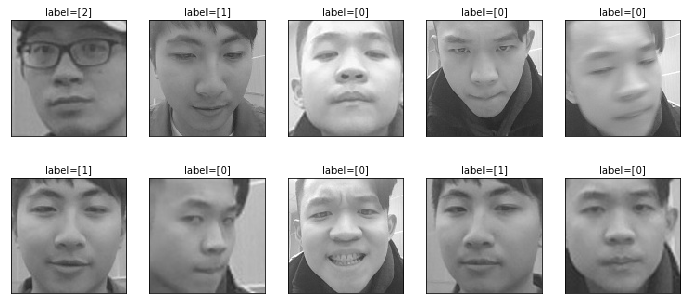

In [4]:
plot_images_labels_prediction(x_Train,y_Train,[],0,10)

In [5]:
print(type(x_Train))
x_Train=np.array(x_Train)
y_Train=np.array(y_Train)
x_Test=np.array(x_Test)
x_Test=np.array(x_Test)
print(type(x_Train))
x_Train4D=x_Train.reshape(x_Train.shape[0],125,125,3).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],125,125,3).astype('float32')
x_Train4D=np.delete(x_Train4D, [1,2], axis=3)
x_Test4D=np.delete(x_Test4D, [1,2], axis=3)
x_Train=np.delete(x_Train, [1,2], axis=3)
x_Test=np.delete(x_Test, [1,2], axis=3)
x_Train4D_normalize = x_Train / 255
x_Test4D_normalize = x_Test / 255
x_Train4D_normalize.shape
from keras.utils import np_utils
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

<class 'list'>
<class 'numpy.ndarray'>


Using TensorFlow backend.


In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [7]:
model = Sequential()
#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(125,125,1), 
                 activation='relu'))
# MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Drop掉部分神經元避免overfitting
model.add(Dropout(0.25))
# 平坦化
model.add(Flatten())
model.add(Dense(128, activation='relu'))#回歸用
model.add(Dropout(0.5))
model.add(Dense(people,activation='softmax'))#分類用
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) #sparse_categorical_crossentropy categorical_crossentropy

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 125, 125, 16)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 36)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 36)        0         
_________________________________________________________________
flatten_1 (Flatten)  

In [8]:
#Model訓練
train_history=model.fit(x=x_Train4D_normalize, y=y_TrainOneHot,validation_split=0.2, epochs=20, batch_size=100,verbose=2)
#存model
model.save("D:/program/python/Dlib/photo_100/data_analysis/model/data_analysis_face_recognize.h5") #face_weight.h5/face_weight_4.h5 face_weight_418

Instructions for updating:
Use tf.cast instead.
Train on 2150 samples, validate on 538 samples
Epoch 1/20
 - 52s - loss: 0.9292 - acc: 0.5986 - val_loss: 0.3687 - val_acc: 0.9480
Epoch 2/20
 - 46s - loss: 0.3004 - acc: 0.9112 - val_loss: 0.1476 - val_acc: 0.9498
Epoch 3/20
 - 44s - loss: 0.1730 - acc: 0.9405 - val_loss: 0.0674 - val_acc: 0.9796
Epoch 4/20
 - 42s - loss: 0.1028 - acc: 0.9674 - val_loss: 0.0463 - val_acc: 0.9851
Epoch 5/20
 - 42s - loss: 0.0611 - acc: 0.9847 - val_loss: 0.0198 - val_acc: 0.9963
Epoch 6/20
 - 42s - loss: 0.0422 - acc: 0.9879 - val_loss: 0.0158 - val_acc: 1.0000
Epoch 7/20
 - 42s - loss: 0.0341 - acc: 0.9912 - val_loss: 0.0120 - val_acc: 0.9963
Epoch 8/20
 - 43s - loss: 0.0272 - acc: 0.9935 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 9/20
 - 42s - loss: 0.0162 - acc: 0.9958 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 10/20
 - 43s - loss: 0.0100 - acc: 0.9991 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 11/20
 - 43s - loss: 0.0093 - acc: 0.9986 - val_loss: 0.00

In [9]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder

prediction_proba=model.predict(x_Test4D_normalize)
prediction = argmax(prediction_proba,axis=1)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_Test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       346
           2       1.00      1.00      1.00       457

   micro avg       1.00      1.00      1.00      1153
   macro avg       1.00      1.00      1.00      1153
weighted avg       1.00      1.00      1.00      1153



# 製作 人臉距離回歸model

In [6]:
#讀資料
train_30_data=[]
train_60_data=[]
train_90_data=[]

def read_distance_data(path,list_name):
    train_data =[]
    return_data = list_name
    with open (path,'r',encoding='utf-8') as file :        
        for line in file:
            if line != '\n':   
                train_data.append(int(line.replace('\n','')))
            else:
                if(len(train_data)==138):
                    return_data.append(train_data)
                train_data =[]
    return return_data

train_30_data=read_distance_data('D:/program/python/Dlib/photo_100/data_analysis/face_distance_train_distance_30.txt',train_30_data)
train_60_data=read_distance_data('D:/program/python/Dlib/photo_100/data_analysis/face_distance_train_distance_60.txt',train_60_data)
train_90_data=read_distance_data('D:/program/python/Dlib/photo_100/data_analysis/face_distance_train_distance_90.txt',train_60_data)
#train_90_data=read_distance_data('D:/program/python/Dlib/photo_100/data_anlysis/face_distance_train_90.txt',train_90_data)

In [7]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import pca #Rpca svd lle lda
from sklearn.model_selection import KFold
import os
import warnings
import numpy as np
warnings.filterwarnings('ignore')

#import model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import tree , neighbors,ensemble,ensemble
#import score
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error,r2_score,explained_variance_score

In [8]:
print('30',len(train_30_data))
print('90',len(train_90_data))
#print('90',len(train_90_data))
min_distance_data = min(len(train_30_data),len(train_90_data))#,len(train_90_data)

30 2542
90 7062


In [9]:
#data
train = train_30_data[:min_distance_data] + train_90_data[:min_distance_data] #+ train_90_data[:min_distance_data]
target = [30 for i in range(min_distance_data)]+[90 for i in range(min_distance_data)]#+[90 for i in range(min_distance_data)]

In [10]:
#train[0]

In [11]:
print(np.array(train).shape,np.array(target).shape)

(5084, 138) (5084,)


In [12]:
#preprocess
from sklearn import preprocessing
#miss
#train = train.fillna(train.median())
#train = preprocessing.scale(train)
#train =preprocessing.normalize(train, norm='l2')
#min_max_scaler = preprocessing.MinMaxScaler()
#train = min_max_scaler.fit_transform(train)
Scale = preprocessing.StandardScaler()
Normal = preprocessing.Normalizer(norm='l2')

In [13]:
#交叉驗證目的是調參
CV=4
SIZE=0.2
STATE=1

train_feature,test_feature,train_label,test_label = train_test_split(train,target,test_size=SIZE,random_state=STATE) 

### LinearRegression

In [32]:
#LinearRegression

#pca = RandomizedPCA(n_components=70,copy=True, iterated_power=3, whiten=True, random_state=42) 
lr = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
model=Pipeline(steps=[('Scale',Scale),('Normal',Normal),('lr',lr)])#('Scale',Scale),('Normal',Normal),

tuned_parameters = [{
                     #'pca__n_components': [30,70,140,500],     
                     'lr__n_jobs': [1,2,None]
                     }]  

scores = ['r2']#'precision', 'recall','f1'

print("SCORE1:")
for score in scores:
    print("%s:" % score)
    clf = GridSearchCV(model, tuned_parameters, cv=CV,scoring='%s' % score)#SVC(kernel='rbf') #_weighted 
    clf.fit(train_feature, train_label)  
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print("Best score on development set:")
    print(clf.best_score_)

print("\n")
print("SCORE2:")

y_true, y_pred = test_label, clf.predict(test_feature)
print('mean_squared_error:',mean_squared_error(y_true,y_pred))
print('mean_absolute_error:',mean_absolute_error(y_true,y_pred))
#print('median_absolute_error:',median_absolute_error(y_true,y_pred))
#print('explained_variance_score:',explained_variance_score(y_true,y_pred))
print('r2_score:',r2_score(y_true,y_pred))

SCORE1:
r2:
Best parameters set found on development set:
{'lr__n_jobs': 1}
Best score on development set:
0.5840843226550181


SCORE2:
mean_squared_error: 94.49038439852154
mean_absolute_error: 7.416822561798202
r2_score: 0.5800405064014953


## DT regression

In [36]:
#pca = RandomizedPCA(n_components=70,copy=True, iterated_power=3, whiten=True, random_state=42) 
DT = tree.DecisionTreeRegressor()
model=Pipeline(steps=[('Scale',Scale),('Normal',Normal),('DT',DT)])#('Scale',Scale),('Normal',Normal),

tuned_parameters = [{
                     #'pca__n_components': [30,70,140,500],     
                     #'lr__n_jobs': [1,2,None]
                     }]  

scores = ['r2']#'precision', 'recall','f1'

print("SCORE1:")
for score in scores:
    print("%s:" % score)
    clf = GridSearchCV(model, tuned_parameters, cv=CV,scoring='%s' % score)#SVC(kernel='rbf') #_weighted 
    clf.fit(train_feature, train_label)  
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print("Best score on development set:")
    print(clf.best_score_)

print("\n")
print("SCORE2:")

y_true, y_pred = test_label, clf.predict(test_feature)
print('mean_squared_error:',mean_squared_error(y_true,y_pred))
print('mean_absolute_error:',mean_absolute_error(y_true,y_pred))
#print('median_absolute_error:',median_absolute_error(y_true,y_pred))
#print('explained_variance_score:',explained_variance_score(y_true,y_pred))
print('r2_score:',r2_score(y_true,y_pred))

SCORE1:
r2:
Best parameters set found on development set:
{}
Best score on development set:
0.7267724651355123


SCORE2:
mean_squared_error: 49.76958525345622
mean_absolute_error: 1.6589861751152073
r2_score: 0.7788006689495899


## RandomForest regression

In [40]:
#pca = RandomizedPCA(n_components=70,copy=True, iterated_power=3, whiten=True, random_state=42) 
RF = ensemble.RandomForestRegressor(n_estimators =20)
model=Pipeline(steps=[('Scale',Scale),('Normal',Normal),('RF',RF)])#('Scale',Scale),('Normal',Normal),

tuned_parameters = [{
                     #'pca__n_components': [30,70,140,500],     
                     #'lr__n_jobs': [1,2,None]
                     }]  

scores = ['r2']#'precision', 'recall','f1'

print("SCORE1:")
for score in scores:
    print("%s:" % score)
    clf = GridSearchCV(model, tuned_parameters, cv=CV,scoring='%s' % score)#SVC(kernel='rbf') #_weighted 
    clf.fit(train_feature, train_label)  
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print("Best score on development set:")
    print(clf.best_score_)

print("\n")
print("SCORE2:")

y_true, y_pred = test_label, clf.predict(test_feature)
print('mean_squared_error:',mean_squared_error(y_true,y_pred))
print('mean_absolute_error:',mean_absolute_error(y_true,y_pred))
#print('median_absolute_error:',median_absolute_error(y_true,y_pred))
#print('explained_variance_score:',explained_variance_score(y_true,y_pred))
print('r2_score:',r2_score(y_true,y_pred))

SCORE1:
r2:
Best parameters set found on development set:
{}
Best score on development set:
0.8577808850762481


SCORE2:
mean_squared_error: 30.50201612903226
mean_absolute_error: 2.3657834101382487
r2_score: 0.8644347641421783


## Adaboost regression

In [47]:
#pca = RandomizedPCA(n_components=70,copy=True, iterated_power=3, whiten=True, random_state=42) 
ada = ensemble.AdaBoostRegressor(n_estimators =50)
model=Pipeline(steps=[('ada',ada)])#('Scale',Scale),('Normal',Normal),

tuned_parameters = [{
                     #'pca__n_components': [30,70,140,500],     
                     #'lr__n_jobs': [1,2,None]
                     }]  

scores = ['r2']#'precision', 'recall','f1'

print("SCORE1:")
for score in scores:
    print("%s:" % score)
    clf = GridSearchCV(model, tuned_parameters, cv=CV,scoring='%s' % score)#SVC(kernel='rbf') #_weighted 
    clf.fit(train_feature, train_label)  
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print("Best score on development set:")
    print(clf.best_score_)

print("\n")
print("SCORE2:")

y_true, y_pred = test_label, clf.predict(test_feature)
print('mean_squared_error:',mean_squared_error(y_true,y_pred))
print('mean_absolute_error:',mean_absolute_error(y_true,y_pred))
#print('median_absolute_error:',median_absolute_error(y_true,y_pred))
#print('explained_variance_score:',explained_variance_score(y_true,y_pred))
print('r2_score:',r2_score(y_true,y_pred))

SCORE1:
r2:
Best parameters set found on development set:
{}
Best score on development set:
0.5156776003698338


SCORE2:
mean_squared_error: 132.00024744722708
mean_absolute_error: 10.675323515427245
r2_score: 0.41332911887611967


## ExtraTree regression

In [51]:
#pca = RandomizedPCA(n_components=70,copy=True, iterated_power=3, whiten=True, random_state=42) 
ET = tree.ExtraTreeRegressor()
model=Pipeline(steps=[('Normal',Normal),('ET',ET)])#('Scale',Scale),('Normal',Normal),

tuned_parameters = [{
                     #'pca__n_components': [30,70,140,500],     
                     #'lr__n_jobs': [1,2,None]
                     }]  

scores = ['r2']#'precision', 'recall','f1'

print("SCORE1:")
for score in scores:
    print("%s:" % score)
    clf = GridSearchCV(model, tuned_parameters, cv=CV,scoring='%s' % score)#SVC(kernel='rbf') #_weighted 
    clf.fit(train_feature, train_label)  
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print("Best score on development set:")
    print(clf.best_score_)

print("\n")
print("SCORE2:")

y_true, y_pred = test_label, clf.predict(test_feature)
print('mean_squared_error:',mean_squared_error(y_true,y_pred))
print('mean_absolute_error:',mean_absolute_error(y_true,y_pred))
#print('median_absolute_error:',median_absolute_error(y_true,y_pred))
#print('explained_variance_score:',explained_variance_score(y_true,y_pred))
print('r2_score:',r2_score(y_true,y_pred))

SCORE1:
r2:
Best parameters set found on development set:
{}
Best score on development set:
0.32320487265481584


SCORE2:
mean_squared_error: 132.7188940092166
mean_absolute_error: 4.423963133640553
r2_score: 0.4101351171989063


## KNN regression

In [14]:
#pca = RandomizedPCA(n_components=70,copy=True, iterated_power=3, whiten=True, random_state=42) 
knn = neighbors.KNeighborsRegressor()
model=Pipeline(steps=[('knn',knn)])#('Scale',Scale),('Normal',Normal),

tuned_parameters = [{
                     #'pca__n_components': [30,70,140,500],     
                     #'lr__n_jobs': [1,2,None]
                     }]  

scores = ['r2']#'precision', 'recall','f1'

print("SCORE1:")
for score in scores:
    print("%s:" % score)
    clf = GridSearchCV(model, tuned_parameters, cv=CV,scoring='%s' % score)#SVC(kernel='rbf') #_weighted 
    clf.fit(train_feature, train_label)  
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print("Best score on development set:")
    print(clf.best_score_)

print("\n")
print("SCORE2:")

y_true, y_pred = test_label, clf.predict(test_feature)
print('mean_squared_error:',mean_squared_error(y_true,y_pred))
print('mean_absolute_error:',mean_absolute_error(y_true,y_pred))
#print('median_absolute_error:',median_absolute_error(y_true,y_pred))
#print('explained_variance_score:',explained_variance_score(y_true,y_pred))
print('r2_score:',r2_score(y_true,y_pred))

SCORE1:
r2:
Best parameters set found on development set:
{}
Best score on development set:
0.9164294521292834


SCORE2:
mean_squared_error: 41.91150442477876
mean_absolute_error: 1.2743362831858407
r2_score: 0.9533403082932274


### SVR Regression

In [17]:
#SVR

#pca = RandomizedPCA(n_components=70,copy=True, iterated_power=3, whiten=True, random_state=42) 
svr = SVR(kernel='rbf', degree=3, gamma=0.001, coef0=0.0, tol=0.001, C=60.0, epsilon=1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
model=Pipeline(steps=[('Scale',Scale),('Normal',Normal),('svr',svr)])#('Scale',Scale),('Normal',Normal),

tuned_parameters = [{          
                     'svr__degree': [3,10,20],
                     'svr__gamma': [0.1,1,10]
                     }]  

scores = ['r2']#'precision', 'recall','f1'

print("SCORE1:")
for score in scores:
    print("%s:" % score)
    clf = GridSearchCV(model, tuned_parameters, cv=CV,scoring='%s' % score)#SVC(kernel='rbf') #_weighted 
    clf.fit(train_feature, train_label) 
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print("Best score on development set:")
    print(clf.best_score_)

print("\n")
print("SCORE2:")

y_true, y_pred = test_label, clf.predict(test_feature)
print('mean_squared_error:',mean_squared_error(y_true,y_pred))
print('mean_absolute_error:',mean_absolute_error(y_true,y_pred))
#print('median_absolute_error:',median_absolute_error(y_true,y_pred))
#print('explained_variance_score:',explained_variance_score(y_true,y_pred))
print('r2_score:',r2_score(y_true,y_pred))

SCORE1:
r2:
Best parameters set found on development set:
{'svr__degree': 3, 'svr__gamma': 10}
Best score on development set:
0.813192296605104


SCORE2:
mean_squared_error: 143.43353239152228
mean_absolute_error: 5.289542892081065
r2_score: 0.8403167699739007


In [18]:
import pickle
with open('D:/program/python/Dlib/photo_100/data_analysis/model/distance.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [26]:
'''
with open('D:/program/python/Dlib/photo_100/data_analysis/distance.pickle', 'rb') as f:
    clf2 = pickle.load(f)
    #测试读取后的Model
print(clf2.predict(test_feature))
'''

"\nwith open('D:/program/python/Dlib/photo_100/data_analysis/distance.pickle', 'rb') as f:\n    clf2 = pickle.load(f)\n    #测试读取后的Model\nprint(clf2.predict(test_feature))\n"

## 人臉辨識 & 距離回歸

In [ ]:
#及時測試 可兩人以上

import dlib                     
import numpy as np              
import cv2                      
from keras.models import load_model
import pickle

class face_emotion():
    
    
    def __init__(self):
        
        self.detector = dlib.get_frontal_face_detector()       
        self.predictor = dlib.shape_predictor("D:/program/python/Dlib/opencv-master/data/haarcascades/shape_predictor_68_face_landmarks.dat")        
        self.cap = cv2.VideoCapture(0)       
        self.cap.set(3, 480)      
        self.cnt = 0
    def learning_face(self):
        count=0
        while(self.cap.isOpened()):
            flag, im_rd = self.cap.read()
            k = cv2.waitKey(1)      
            img_gray = cv2.cvtColor(im_rd, cv2.COLOR_RGB2GRAY) #灰階      
            faces = self.detector(img_gray, 0) 
            font = cv2.FONT_HERSHEY_SIMPLEX

            if(len(faces)!=0):          
                cv2.imwrite("D:/program/python/Dlib/photo_100/face_predict/face/face0.jpg", img_gray) #img_gray im_rdㄒ 
                img = cv2.imread("D:/program/python/Dlib/photo_100/face_predict/face/face0.jpg")    
                face_rects = self.detector(img, 0)
                #for f in range(len(face_rects)):
                people_face = 0
                for i, d in enumerate(face_rects):
                    distance=[]

                    img_ = img[d.top():d.bottom(),d.left():d.right()]
                    distance.append(str(d.right() - d.left())) #此人臉的寬度
                    distance.append(str(d.bottom() - d.top()))
                    img2 = cv2.resize(img_, (125,125), interpolation=cv2.INTER_CUBIC) 
                    cv2.imwrite("D:/program/python/Dlib/photo_100/face_predict/face_cut/face_cut"+str(people_face)+".jpg", img2)
                    img_face = cv2.imread("D:/program/python/Dlib/photo_100/face_predict/face_cut/face_cut"+str(people_face)+".jpg")
                    shape = self.predictor(im_rd, d)

                    for point in range(68):
                        #cv2.circle(im_rd, (shape.part(point).x, shape.part(point).y), 2, (0, 255, 0), -1, 8)
                        distance.append(str(shape.part(point).y -d.top() ))
                        distance.append(str(shape.part(point).x -d.left()))
                    #return distance
                    D=[]
                    D.append(distance)
                    D.append(distance)
                    dis_ans=distance_model.predict(D)
                    test2=str(dis_ans[0])

                    train=[]
                    for i in range(2):#多一個當標題
                        train.append([])                                        
                    train[0]=img_face
                    train[1]=img_face
                    X_train=np.array(train)
                    x_Train4D=X_train.reshape(X_train.shape[0],125,125,3).astype('float32')
                    x_Train4D=np.delete(x_Train4D, [1,2], axis=3)
                    x_Test4D_normalize=x_Train4D/ 255
                    ans=model.predict_classes(x_Test4D_normalize)
                    text=str(ans[0])

                    if(text=='0'):
                        text='phchen'
                    if(text=='1'):
                        text='jeff'

                    im_rd = cv2.putText(im_rd, text+' '+test2, (d.left(), d.top()), font, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
                    people_face+=1
            else:

                cv2.putText(im_rd, "No Face", (20, 50), font, 1, (0, 0, 255), 1, cv2.LINE_AA)
            #im_rd = cv2.putText(im_rd, "S: screenshot", (20, 400), font, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
            #im_rd = cv2.putText(im_rd, "Q: quit", (20, 450), font, 0.8, (0, 0, 255), 1, cv2.LINE_AA)     
            cv2.imshow("camera", im_rd)  

        self.cap.release()
        cv2.destroyAllWindows()


if __name__ == "__main__":
    model= load_model('D:/program/python/Dlib/photo_100/data_analysis/model/data_analysis_face_recognize.h5')
    with open('D:/program/python/Dlib/photo_100/data_analysis/model/distance.pickle', 'rb') as f:
        distance_model = pickle.load(f)
    my_face = face_emotion()
    my_face.learning_face()

## 文字 情緒 NER

### 計算訓練資料的字句最大字數

In [4]:
from keras.layers.core import Activation, Dense
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.layers import GRU,SimpleRNN, Activation, Dense,Bidirectional
from keras.models import Sequential
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import collections
import nltk
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report

maxlen = 0
word_freqs = collections.Counter()
num_recs = 0
with open('D:/program/python/Dlib/photo_100/data_analysis/train_mood.txt','r+', encoding='UTF-8') as f: #影評 NLTK Sentiment1_training   train_mood
    for line in f:
        #print(line)
        label, sentence = line.strip().split("\t")
        words = nltk.word_tokenize(sentence.lower())
        if len(words) > maxlen:
            maxlen = len(words)
        for word in words:
            word_freqs[word] += 1
        num_recs += 1
print('max_len ',maxlen)
print('nb_words ', len(word_freqs))

max_len  128
nb_words  115354


### 準備數據 onehot encoding

In [5]:
## 準備數據
MAX_FEATURES = 2000
MAX_SENTENCE_LENGTH = 40
vocab_size = min(MAX_FEATURES, len(word_freqs)) + 2
word_index = {x[0]: i+2 for i, x in enumerate(word_freqs.most_common(MAX_FEATURES))}
word_index["PAD"] = 0
word_index["UNK"] = 1
index2word = {v:k for k, v in word_index.items()}
X = np.empty(num_recs,dtype=list)
y = np.zeros(num_recs)
i=0

# 讀取訓練資料，將每一單字以 dictionary 儲存
with open('D:/program/python/Dlib/photo_100/data_analysis/train_mood.txt','r+', encoding='UTF-8') as f: #Sentiment1_training.txt train_mood.txt
    for line in f:
        label, sentence = line.strip().split("\t")
        words = nltk.word_tokenize(sentence.lower())
        seqs = []
        for word in words:
            if word in word_index:
                seqs.append(word_index[word])
            else:
                seqs.append(word_index["UNK"])
        X[i] = seqs
        y[i] = int(label)
        i += 1
# 字句長度不足補空白        
X = sequence.pad_sequences(X, maxlen=MAX_SENTENCE_LENGTH)

In [6]:
# 資料劃分訓練組及測試組
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
EMBEDDING_SIZE = 128
HIDDEN_LAYER_SIZE = 64
BATCH_SIZE = 32
NUM_EPOCHS = 10

### 實測副函式

In [8]:
def mood(text,model_path):

    Text1=input(text)
    print(Text1,end='')

    #print("\n predict ......")
    model= load_model(model_path)

    ## 探索數據分析(EDA)
    # 計算訓練資料的字句最大字數
    maxlen = 0
    word_freqs = collections.Counter()
    num_recs = 0
    with open('D:/program/python/Dlib/photo_100/data_analysis/train_mood.txt','r+', encoding='UTF-8') as f:
        for line in f:
            label, sentence = line.strip().split("\t")
            words = nltk.word_tokenize(sentence.lower())
            if len(words) > maxlen:
                maxlen = len(words)
            for word in words:
                word_freqs[word] += 1
            num_recs += 1

    ## 準備數據
    MAX_FEATURES = 2000
    MAX_SENTENCE_LENGTH = 40
    vocab_size = min(MAX_FEATURES, len(word_freqs)) + 2
    word_index = {x[0]: i+2 for i, x in enumerate(word_freqs.most_common(MAX_FEATURES))}
    word_index["PAD"] = 0
    word_index["UNK"] = 1
    index2word = {v:k for k, v in word_index.items()}
    X = np.empty(num_recs,dtype=list)
    y = np.zeros(num_recs)
    i=0
    # 讀取訓練資料，將每一單字以 dictionary 儲存
    with open('./Sentiment1_training.txt','r+', encoding='UTF-8') as f:
        for line in f:
            label, sentence = line.strip().split("\t")
            words = nltk.word_tokenize(sentence.lower())
            seqs = []
            for word in words:
                if word in word_index:
                    seqs.append(word_index[word])
                else:
                    seqs.append(word_index["UNK"])
            X[i] = seqs
            y[i] = int(label)
            i += 1

    # 字句長度不足補空白        
    X = sequence.pad_sequences(X, maxlen=MAX_SENTENCE_LENGTH)


    INPUT_SENTENCES = [Text1]# ,Text2,Text3
    XX = np.empty(len(INPUT_SENTENCES),dtype=list)
    # 轉換文字為數值
    i=0
    for sentence in  INPUT_SENTENCES:
        words = nltk.word_tokenize(sentence.lower())
        seq = []
        for word in words:
            if word in word_index:
                seq.append(word_index[word])
            else:
                seq.append(word_index['UNK'])
        XX[i] = seq
        i+=1

    XX = sequence.pad_sequences(XX, maxlen=MAX_SENTENCE_LENGTH)
    # 預測，並將結果四捨五入，轉換為 0 或 1
    labels = [int(round(x[0])) for x in model.predict(XX) ]
    label2word = {1:'正面', 0:'負面'}
    # 顯示結果

    #print("\n以下分析剛剛對話情緒:")

    for i in range(len(INPUT_SENTENCES)):
        print('  '+label2word[labels[i]]) #, INPUT_SENTENCES[i]

### RNN

In [ ]:
# 模型構建

model = Sequential()
# 加『嵌入』層
model.add(Embedding(vocab_size, EMBEDDING_SIZE,input_length=MAX_SENTENCE_LENGTH))
# 加『LSTM』層
model.add(SimpleRNN(batch_input_shape=(None, word_freqs), units= 50,unroll=True,)) 
model.add(Dense(1))
model.add(Activation("sigmoid"))
# binary_crossentropy:二分法
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

# 模型訓練
model.fit(Xtrain, ytrain, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,validation_data=(Xtest, ytest))

# 預測
score, acc = model.evaluate(Xtest, ytest, batch_size=BATCH_SIZE)
predictions = model.predict_classes(Xtest)

print("\n accuracy: %.3f" % (acc))
print()
print(classification_report(ytest, predictions))

print('{}   {}      {}'.format('預測','真實','句子'))
for i in range(5):
    idx = np.random.randint(len(Xtest))
    xtest = Xtest[idx].reshape(1,MAX_SENTENCE_LENGTH)
    ylabel = ytest[idx]
    ypred = model.predict(xtest)[0][0]
    sent = " ".join([index2word[x] for x in xtest[0] if x != 0])
    print(' {}      {}     {}'.format(int(round(ypred)), int(ylabel), sent))
    

model.save("D:/program/python/Dlib/photo_100/data_analysis/model/word_mood_RNN_twitter.h5") 

In [11]:
print("\n accuracy: %.3f" % (acc))
print()
print(classification_report(ytest, predictions))

print('{}   {}      {}'.format('預測','真實','句子'))
for i in range(5):
    idx = np.random.randint(len(Xtest))
    xtest = Xtest[idx].reshape(1,MAX_SENTENCE_LENGTH)
    ylabel = ytest[idx]
    ypred = model.predict(xtest)[0][0]
    sent = " ".join([index2word[x] for x in xtest[0] if x != 0])
    print(' {}      {}     {}'.format(int(round(ypred)), int(ylabel), sent))
    

model.save("D:/program/python/Dlib/photo_100/data_analysis/model/word_mood_RNN_twitter.h5")


 accuracy: 0.728

              precision    recall  f1-score   support

         0.0       0.68      0.72      0.70      8571
         1.0       0.77      0.74      0.75     11032

   micro avg       0.73      0.73      0.73     19603
   macro avg       0.73      0.73      0.73     19603
weighted avg       0.73      0.73      0.73     19603

預測   真實      句子
 1      1     @ UNK omg that sounds UNK !
 0      0     @ the office UNK ice cream
 1      1     @ UNK i UNK it n it works lol UNK woot ! ! ok so its going to take sum time to get use to it http : UNK
 1      0     # i am really # bored # so i decided to do some # UNK UNK . # it # is # fun but not there 's not as # UNK as # UNK ... # UNK
 1      1     @ UNK cause it is cute and pretty and UNK !


In [36]:
mood("how r u","D:/program/python/Dlib/photo_100/data_analysis/model/word_mood_RNN_twitter.h5")

how r u i am great


i am great  負面


In [ ]:
mood("how r u","D:/program/python/Dlib/photo_100/data_analysis/model/word_mood_RNN_NLTK.h5")

### GRU

In [16]:
# 模型構建

model = Sequential()
# 加『嵌入』層
model.add(Embedding(vocab_size, EMBEDDING_SIZE,input_length=MAX_SENTENCE_LENGTH))
# 加『LSTM』層
model.add(GRU(batch_input_shape=(None, word_freqs), units= 50,unroll=True,)) 
model.add(Dense(1))
model.add(Activation("sigmoid"))
# binary_crossentropy:二分法
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

# 模型訓練
model.fit(Xtrain, ytrain, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,validation_data=(Xtest, ytest))

# 預測
score, acc = model.evaluate(Xtest, ytest, batch_size=BATCH_SIZE)
predictions = model.predict_classes(Xtest)

print("\n accuracy: %.3f" % ( acc))
print()
print(classification_report(ytest, predictions))
for i in range(5):
    idx = np.random.randint(len(Xtest))
    xtest = Xtest[idx].reshape(1,MAX_SENTENCE_LENGTH)
    ylabel = ytest[idx]
    ypred = model.predict(xtest)[0][0]
    sent = " ".join([index2word[x] for x in xtest[0] if x != 0])
    print(' {}      {}     {}'.format(int(round(ypred)), int(ylabel), sent))
    

model.save("D:/program/python/Dlib/photo_100/data_analysis/model/word_mood_GRU_twitter.h5") 

Train on 5668 samples, validate on 1418 samples
Epoch 1/10
5668/5668 [==============================] - 8s 1ms/step - loss: 0.1939 - acc: 0.9199 - val_loss: 0.0603 - val_acc: 0.9781
Epoch 2/10
5668/5668 [==============================] - 3s 511us/step - loss: 0.0155 - acc: 0.9959 - val_loss: 0.0466 - val_acc: 0.9859
Epoch 3/10
5668/5668 [==============================] - 4s 657us/step - loss: 0.0055 - acc: 0.9989 - val_loss: 0.0508 - val_acc: 0.9880
Epoch 4/10
5668/5668 [==============================] - 4s 652us/step - loss: 0.0036 - acc: 0.9996 - val_loss: 0.0444 - val_acc: 0.9894
Epoch 5/10
5668/5668 [==============================] - 4s 652us/step - loss: 0.0019 - acc: 0.9998 - val_loss: 0.0496 - val_acc: 0.9887
Epoch 6/10
5668/5668 [==============================] - 4s 680us/step - loss: 0.0033 - acc: 0.9995 - val_loss: 0.0589 - val_acc: 0.9901
Epoch 7/10
5668/5668 [==============================] - 4s 662us/step - loss: 0.0063 - acc: 0.9986 - val_loss: 0.0617 - val_acc: 0.9852
Ep

In [ ]:
mood("how r u","D:/program/python/Dlib/photo_100/data_analysis/model/word_mood_GRU_twitter.h5")

In [ ]:
mood("how r u","D:/program/python/Dlib/photo_100/data_analysis/model/word_mood_GRU_NLTK.h5")

### LSTM

In [17]:
# 模型構建

model = Sequential()
# 加『嵌入』層
model.add(Embedding(vocab_size, EMBEDDING_SIZE,input_length=MAX_SENTENCE_LENGTH))
# 加『LSTM』層
model.add(LSTM(HIDDEN_LAYER_SIZE, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))
model.add(Activation("sigmoid"))
# binary_crossentropy:二分法
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

# 模型訓練
model.fit(Xtrain, ytrain, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,validation_data=(Xtest, ytest))

# 預測
score, acc = model.evaluate(Xtest, ytest, batch_size=BATCH_SIZE)
predictions = model.predict_classes(Xtest)

print("\n accuracy: %.3f" % (acc))
print()
print(classification_report(ytest, predictions))
for i in range(5):
    idx = np.random.randint(len(Xtest))
    xtest = Xtest[idx].reshape(1,MAX_SENTENCE_LENGTH)
    ylabel = ytest[idx]
    ypred = model.predict(xtest)[0][0]
    sent = " ".join([index2word[x] for x in xtest[0] if x != 0])
    print(' {}      {}     {}'.format(int(round(ypred)), int(ylabel), sent))
    

model.save("D:/program/python/Dlib/photo_100/data_analysis/model/word_mood_LSTM_twitter.h5") 

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 5668 samples, validate on 1418 samples
Epoch 1/10
5668/5668 [==============================] - 9s 2ms/step - loss: 0.2317 - acc: 0.8977 - val_loss: 0.0579 - val_acc: 0.9781
Epoch 2/10
5668/5668 [==============================] - 7s 1ms/step - loss: 0.0183 - acc: 0.9958 - val_loss: 0.0555 - val_acc: 0.9859
Epoch 3/10
5668/5668 [==============================] - 7s 1ms/step - loss: 0.0126 - acc: 0.9963 - val_loss: 0.0461 - val_acc: 0.9880
Epoch 4/10
5668/5668 [==============================] - 7s 1ms/step - loss: 0.0037 - acc: 0.9991 - val_loss: 0.0626 - val_acc: 0.9880
Epoch 5/10
5668/5668 [==============================] - 7s 1ms/step - loss: 0.0041 - acc: 0.9995 - val_loss: 0.0503 - val_acc: 0.9887
Epoch 6/10
5668/5668 [==============================] - 7s 1ms/step - loss: 0.0011 - acc: 0.9996 - val_loss: 0.0531 - val_acc: 0.9873
Epoch 7/10
5668/5668 [===========

In [ ]:
mood("how r u","D:/program/python/Dlib/photo_100/data_analysis/model/word_mood_LSTM_twitter.h5")

In [ ]:
mood("how r u","D:/program/python/Dlib/photo_100/data_analysis/model/word_mood_LSTM_NLTK.h5")

### BILSTM

In [18]:
# 模型構建

model = Sequential()
# 加『嵌入』層
model.add(Embedding(vocab_size, EMBEDDING_SIZE,input_length=MAX_SENTENCE_LENGTH))
# 加『LSTM』層
model.add(Bidirectional(LSTM(HIDDEN_LAYER_SIZE, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1))
model.add(Activation("sigmoid"))
# binary_crossentropy:二分法
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

# 模型訓練
model.fit(Xtrain, ytrain, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,validation_data=(Xtest, ytest))

# 預測
score, acc = model.evaluate(Xtest, ytest, batch_size=BATCH_SIZE)
predictions = model.predict_classes(Xtest)

print("\n accuracy: %.3f" % (acc))
print()
print(classification_report(ytest, predictions))
for i in range(5):
    idx = np.random.randint(len(Xtest))
    xtest = Xtest[idx].reshape(1,MAX_SENTENCE_LENGTH)
    ylabel = ytest[idx]
    ypred = model.predict(xtest)[0][0]
    sent = " ".join([index2word[x] for x in xtest[0] if x != 0])
    print(' {}      {}     {}'.format(int(round(ypred)), int(ylabel), sent))
    

model.save("D:/program/python/Dlib/photo_100/data_analysis/model/word_mood_BILSTM_twitter.h5") 

Train on 5668 samples, validate on 1418 samples
Epoch 1/10
5668/5668 [==============================] - 14s 2ms/step - loss: 0.2284 - acc: 0.8993 - val_loss: 0.0625 - val_acc: 0.9788
Epoch 2/10
5668/5668 [==============================] - 10s 2ms/step - loss: 0.0243 - acc: 0.9931 - val_loss: 0.0493 - val_acc: 0.9866
Epoch 3/10
5668/5668 [==============================] - 10s 2ms/step - loss: 0.0094 - acc: 0.9975 - val_loss: 0.0530 - val_acc: 0.9852
Epoch 4/10
5668/5668 [==============================] - 10s 2ms/step - loss: 0.0043 - acc: 0.9991 - val_loss: 0.0572 - val_acc: 0.9887
Epoch 5/10
5668/5668 [==============================] - 10s 2ms/step - loss: 0.0052 - acc: 0.9986 - val_loss: 0.0819 - val_acc: 0.9788
Epoch 6/10
5668/5668 [==============================] - 11s 2ms/step - loss: 0.0045 - acc: 0.9993 - val_loss: 0.0805 - val_acc: 0.9859
Epoch 7/10
5668/5668 [==============================] - 12s 2ms/step - loss: 0.0020 - acc: 0.9996 - val_loss: 0.0911 - val_acc: 0.9859
Epoch 8

In [ ]:
mood("how r u","D:/program/python/Dlib/photo_100/data_analysis/model/word_mood_BILSTM_twitter.h5")

In [ ]:
mood("how r u","D:/program/python/Dlib/photo_100/data_analysis/model/word_mood_BILSTM_NLTK.h5")

## 組合影像 聲音 文字

In [3]:
import dlib                     
import numpy as np              
import cv2                      
from keras.models import load_model
import pickle
import speech_recognition
import time
import os
import wave
import warnings
import nltk
import collections
from keras.preprocessing import sequence
import pyttsx3
import pyaudio
warnings.filterwarnings('ignore')

class face_emotion():


    def __init__(self):

        self.detector = dlib.get_frontal_face_detector()       
        self.predictor = dlib.shape_predictor("D:/program/python/Dlib/opencv-master/data/haarcascades/shape_predictor_68_face_landmarks.dat")        
        self.cap = cv2.VideoCapture(0)       
        self.cap.set(3, 480)      
        self.cnt = 0
    def learning_face(self):
        count=0
        while(self.cap.isOpened()):
            flag, im_rd = self.cap.read()
            k = cv2.waitKey(1)      
            img_gray = cv2.cvtColor(im_rd, cv2.COLOR_RGB2GRAY) #灰階      
            faces = self.detector(img_gray, 0) 
            font = cv2.FONT_HERSHEY_SIMPLEX

            if(len(faces)!=0):          
                cv2.imwrite("D:/program/python/Dlib/photo_100/face_predict/face/face0.jpg", img_gray) #img_gray im_rdㄒ 
                img = cv2.imread("D:/program/python/Dlib/photo_100/face_predict/face/face0.jpg")    
                face_rects = self.detector(img, 0)
                #for f in range(len(face_rects)):
                people_face = 0
                for i, d in enumerate(face_rects):
                    distance=[]
                    test2=''
                    img_ = img[d.top():d.bottom(),d.left():d.right()]
                    distance.append(str(d.right() - d.left())) #此人臉的寬度
                    distance.append(str(d.bottom() - d.top()))
                    img2 = cv2.resize(img_, (125,125), interpolation=cv2.INTER_CUBIC) 
                    cv2.imwrite("D:/program/python/Dlib/photo_100/face_predict/face_cut/face_cut"+str(people_face)+".jpg", img2)
                    img_face = cv2.imread("D:/program/python/Dlib/photo_100/face_predict/face_cut/face_cut"+str(people_face)+".jpg")
                    shape = self.predictor(im_rd, d)

                    for point in range(68):
                        #cv2.circle(im_rd, (shape.part(point).x, shape.part(point).y), 2, (0, 255, 0), -1, 8)
                        distance.append(str(shape.part(point).y -d.top() ))
                        distance.append(str(shape.part(point).x -d.left()))
                    #return distance
                    D=[]
                    D.append(distance)
                    D.append(distance)
                    dis_ans=distance_model.predict(D)
                    test2=str(dis_ans[0])

                    train=[]
                    for i in range(2):#多一個當標題
                        train.append([])                                        
                    train[0]=img_face
                    train[1]=img_face
                    X_train=np.array(train)
                    x_Train4D=X_train.reshape(X_train.shape[0],125,125,3).astype('float32')
                    x_Train4D=np.delete(x_Train4D, [1,2], axis=3)
                    x_Test4D_normalize=x_Train4D/ 255
                    ans=model.predict_classes(x_Test4D_normalize)
                    text=str(ans[0])

                    if(text=='0'):
                        text='phchen'
                    if(text=='1'):
                        text='jeff'
                    if(text=='2'):
                        text='barry'

                    im_rd = cv2.putText(im_rd, text+' '+test2, (d.left(), d.top()), font, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
                    people_face+=1
                    
                    if(text=='jeff' and dis_ans[0]<=35):
                        return 1   
            else:

                cv2.putText(im_rd, "No Face", (20, 50), font, 1, (0, 0, 255), 1, cv2.LINE_AA)
            #im_rd = cv2.putText(im_rd, "S: screenshot", (20, 400), font, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
            #im_rd = cv2.putText(im_rd, "Q: quit", (20, 450), font, 0.8, (0, 0, 255), 1, cv2.LINE_AA)     
            cv2.imshow("camera", im_rd)  

        self.cap.release()
        cv2.destroyAllWindows()

def mood(text):

    Text1=input(text)
    print(Text1,end='')

    #print("\n predict ......")
    model= load_model('D:/program/python/Dlib/photo_100/data_analysis/model/word_mood_LSTM_NLTK.h5')

    ## 探索數據分析(EDA)
    # 計算訓練資料的字句最大字數
    maxlen = 0
    word_freqs = collections.Counter()
    num_recs = 0
    with open('./Sentiment1_training.txt','r+', encoding='UTF-8') as f:
        for line in f:
            label, sentence = line.strip().split("\t")
            words = nltk.word_tokenize(sentence.lower())
            if len(words) > maxlen:
                maxlen = len(words)
            for word in words:
                word_freqs[word] += 1
            num_recs += 1

    ## 準備數據
    MAX_FEATURES = 2000
    MAX_SENTENCE_LENGTH = 40
    vocab_size = min(MAX_FEATURES, len(word_freqs)) + 2
    word_index = {x[0]: i+2 for i, x in enumerate(word_freqs.most_common(MAX_FEATURES))}
    word_index["PAD"] = 0
    word_index["UNK"] = 1
    index2word = {v:k for k, v in word_index.items()}
    X = np.empty(num_recs,dtype=list)
    y = np.zeros(num_recs)
    i=0
    # 讀取訓練資料，將每一單字以 dictionary 儲存
    with open('./Sentiment1_training.txt','r+', encoding='UTF-8') as f:
        for line in f:
            label, sentence = line.strip().split("\t")
            words = nltk.word_tokenize(sentence.lower())
            seqs = []
            for word in words:
                if word in word_index:
                    seqs.append(word_index[word])
                else:
                    seqs.append(word_index["UNK"])
            X[i] = seqs
            y[i] = int(label)
            i += 1

    # 字句長度不足補空白        
    X = sequence.pad_sequences(X, maxlen=MAX_SENTENCE_LENGTH)


    INPUT_SENTENCES = [Text1]# ,Text2,Text3
    XX = np.empty(len(INPUT_SENTENCES),dtype=list)
    # 轉換文字為數值
    i=0
    for sentence in  INPUT_SENTENCES:
        words = nltk.word_tokenize(sentence.lower())
        seq = []
        for word in words:
            if word in word_index:
                seq.append(word_index[word])
            else:
                seq.append(word_index['UNK'])
        XX[i] = seq
        i+=1

    XX = sequence.pad_sequences(XX, maxlen=MAX_SENTENCE_LENGTH)
    # 預測，並將結果四捨五入，轉換為 0 或 1
    labels = [int(round(x[0])) for x in model.predict(XX) ]
    label2word = {1:'正面', 0:'負面'}
    # 顯示結果

    #print("\n以下分析剛剛對話情緒:")

    for i in range(len(INPUT_SENTENCES)):
        print('  '+label2word[labels[i]]) #, INPUT_SENTENCES[i]
        
 
if __name__ == "__main__":
    model= load_model('D:/program/python/Dlib/photo_100/data_analysis/model/data_analysis_face_recognize.h5')
    with open('D:/program/python/Dlib/photo_100/data_analysis/model/distance.pickle', 'rb') as f:
        distance_model = pickle.load(f)
    my_face = face_emotion()
    end = my_face.learning_face()
    cv2.VideoCapture(0).release()
    cv2.destroyAllWindows()
    mood("how are you today")
    mood("how is your dinner today")
    mood("how is the movie")

how are you today my day was really awesome


my day was really awesome  正面


how is your dinner today the dinner is fuckin terrible as shit


the dinner is fuckin terrible as shit  負面


how is the movie the movie sucked so bad  i hate it so much


the movie sucked so bad  i hate it so much  負面
